# Practical Session 2: Introduction to Python

## Laboratorio de Robótica 
### Grado en Ingeniería Electrónica, Mecatrónica y Robótica
### Universidad de Sevilla

## Objectives

The objective of this notebook is to propose some exercises to practise with Python and get familiar with data types, loops, functions, classes, and so on.

After completing the missing code in this notebook, export it as a Python script. You can do that both using Jupyther Notebook or through the Jupyter extension in VS Code. Then name your file `exercises_sol.py` and commit it to your course Github repository, into a folder named `python_exercises`.

### Exercise 1

Define a function called `squares` that, given a list `sec` of numbers, returns a list with the squares of those numbers, in the same order.

In [1]:
def squares(list):
    l=[]
    for v in list:
        l.append(v**2)
    
    return l

a=[2, -1.2, 3e2, 1j]

print(squares(a))


print(squares(i for i in range(10)))





[4, 1.44, 90000.0, (-1+0j)]
[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


### Exercise 2

A positive integer is said to be perfect if it coincides with the sum of all its proper divisors (that is, other than itself). Define a function called `write_perfect` that, given two positive integers `m` $\leq$ `n`, returns a list with all the perfect numbers within the interval `[m, n]`. The function should also print on the screen each perfect number and its divisors. 

In [5]:
def write_perfect(m,n):
    
    for i in range(m,n+1):
        sum=0
        l=divisor(i)
        #sum(divisor(i)) o sum(l)

        for v in l:
            sum+=v
        
        if sum== i:
            print(f"Number {i} is perfect and its divisors are{l} ")
    return 


def divisor(a):
    l=[]
    for i in range(1,a):
        if a%i == 0:
            l.append(i)
    return l

write_perfect(1,1000)

Number 6 is perfect and its divisors are[1, 2, 3] 
Number 28 is perfect and its divisors are[1, 2, 4, 7, 14] 
Number 496 is perfect and its divisors are[1, 2, 4, 8, 16, 31, 62, 124, 248] 


### Exercise 3

Consider a dictionary whose keys are character strings of length one and the associated values ​​are non-negative integers, such as the following dictionary `d`:

In [6]:
d = {'a': 5, 'b': 10, 'c': 12, 'd': 11, 'e': 15, 'f': 20, 'g': 15, 'h': 9, 'i': 7, 'j': 2}

Define a function called `horizontal_histogram` that, given a dictionary of the previous type, writes the associated histogram of horizontal bars on the screen, printing the bars from top to bottom in the order determined by the `sorted` function on the keys, as illustrated in the following example:

In [7]:
def horizontal_histogram(dict):
    for k,v in dict.items():
        print(k,":","*"*v)

horizontal_histogram(d)


a : *****
b : **********
c : ************
d : ***********
e : ***************
f : ********************
g : ***************
h : *********
i : *******
j : **


### Exercise 4

Suppose we want to simulate the trajectory of a drone that is launched at a given point with a certain initial height. The drone is launched forward with an initial speed and at a certain angle without propulsion motors on. Initially it will advance upwards, but due to the force of gravity, at a given moment it will begin to descend until it lands. For simplicity, we will assume that there is no friction or wind resistance.

Define a class `Drone` that represents the state of the drone at a given instant of time. At least, the class should include attributes to store the following data:
+ Traveled distance traveled (horizontally)
+ Height
+ Horizontal speed
+ Vertical speed

In addition, apart from its constructor, the class should have the following three methods:
+ `get_pos_x`: it returns the horizontal traveled distance 
+ `get_pos_y`: it returns the vertical traveled distance 
+ `update_position`: given a number `t` of seconds, it updates the position and velocity of the projectile after that time has elapsed

Once the `Drone` class is defined, define an external function called `land` that, given the `height` (meters), `velocity` (meters per second), `angle` (degrees) and time `step` (seconds), prints on the screen the different positions of a drone launched with that initial `height`, `velocity` and `angle`. The position of the drone should be displayed at each `step` of time, until it lands. The function should also print the maximum height reached by the drone, the total distance traveled horizontally and the time and number of steps that it took it to land.

Indications:
1. If the drone has an initial velocity $v$ and is launched at an angle $\theta$, the horizontal and vertical components of the initial velocity are $v \times \cos(\theta)$ and $v \times \ sin(\theta)$, respectively.
2. The horizontal component of velocity, in the absence of friction and wind, will remain constant.
3. The vertical component of the velocity evolves throughout time: if $vy_0$ is the initial vertical velocity, after a time step $t$, the velocity will be $vy_1 = vy_0 - 9.8 \times t$, due to the Earth's gravity.
4. Also, if $h_0$ is the initial drone height, after a time step $t$, the height will be $h_1 = h_0 + vm \times t$, where $vm$ is the average between the previous $vy_0$ and $vy_1$.

In [21]:
import math

class Drone():
    def __init__(self,distance=0,heigh=0,hspeed=0,vspeed=0):
        self.dist=distance
        self.init_heigh=heigh

        self.h=heigh
        self.hspeed=hspeed
        self.init_speed=vspeed
        self.vspeed=vspeed
    
    def get_pos_x(self,t):
        return (t*self.hspeed)

    def get_pos_y(self,t,newspeed):
        return (self.init_heigh+t*(newspeed+self.init_speed)/2)

    def update_position(self,t):
        newspeed=self.init_speed-9.8*t
        self.dist=self.get_pos_x(t)
        self.h=self.get_pos_y(t,newspeed)
        self.vspeed=newspeed


def land(dron,heigh,velocity,angle,step):
    t=0.0
    cont=0
    dron.init_heigh=heigh
    dron.h=heigh
    dron.hspeed=velocity*math.cos(math.radians(angle))
    dron.init_speed=velocity*math.sin(math.radians(angle))
    dron.update_position(t)
    max_h=dron.init_heigh
    while(dron.h>0):
        
        #print(dron.vspeed)
        print(f"Drone at position ({dron.dist:.1f},{dron.h:.1f})")
        
        t+=step
        dron.update_position(t)
        cont+=1
        if dron.h>max_h:
            max_h=dron.h
    
    print("")
    print(f"After {cont} steps of {step} seconds ({step*cont} seconds), the drone has landed.")
    print(f"It has traveled a distance of {dron.dist:.1f} meters.")
    print(f"It has reached a maximum height of {max_h} meters.")
    return

dron=Drone()
land(dron,30,1,20,0.1)


Drone at position (0.0,30.0)
Drone at position (0.1,30.0)
Drone at position (0.2,29.9)
Drone at position (0.3,29.7)
Drone at position (0.4,29.4)
Drone at position (0.5,28.9)
Drone at position (0.6,28.4)
Drone at position (0.7,27.8)
Drone at position (0.8,27.1)
Drone at position (0.8,26.3)
Drone at position (0.9,25.4)
Drone at position (1.0,24.4)
Drone at position (1.1,23.4)
Drone at position (1.2,22.2)
Drone at position (1.3,20.9)
Drone at position (1.4,19.5)
Drone at position (1.5,18.0)
Drone at position (1.6,16.4)
Drone at position (1.7,14.7)
Drone at position (1.8,13.0)
Drone at position (1.9,11.1)
Drone at position (2.0,9.1)
Drone at position (2.1,7.0)
Drone at position (2.2,4.9)
Drone at position (2.3,2.6)
Drone at position (2.3,0.2)

After 26 steps of 0.1 seconds (2.6 seconds), the drone has landed.
It has traveled a distance of 2.4 meters.
It has reached a maximum height of 30 meters.


### Exercise 5

Define a function called `matrix_operation` that receives an integer `n` as argument. The function should create a NumPy array (vector) with the integers within the interval $[n,n+25)$ and perform the following operations:

+ Calculate the mean and standard deviation of the array and print it on the screen.
+ Reshape the array into a 5x5 matrix, calculate the determinant of the matrix and print the result on the screen.
+ Return a tuple with the three computed values `(mean, std, determinant)`.

In [10]:
import numpy as np


def matrix_operation(n):
    l=np.arange(n,n+25,1)
    #print(l)
    mean=np.mean(l)
    std=np.std(l)
    print(f"La media es {mean:.1f} y la desviacion típica es {std:.2f}")
    lr=np.reshape(l,(5,5))
    #print(lr)
    determinant=np.linalg.det(lr)
    print(f"El determinante de la matriz es {determinant}")

    return 0

matrix_operation(1)






[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]
La media es 13.0 y la desviación típica es 7.21
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]]
El determinante de la matriz es 0.0


0

### Exercise 6

Create a function called `plot_functions` that makes a figure and plot the following functions over the range $[0, 10]$:

+ $y_1 = sin(x)$
+ $y_2 = cos(x)$

The figure should also include appropriate labels, title, and a legend.

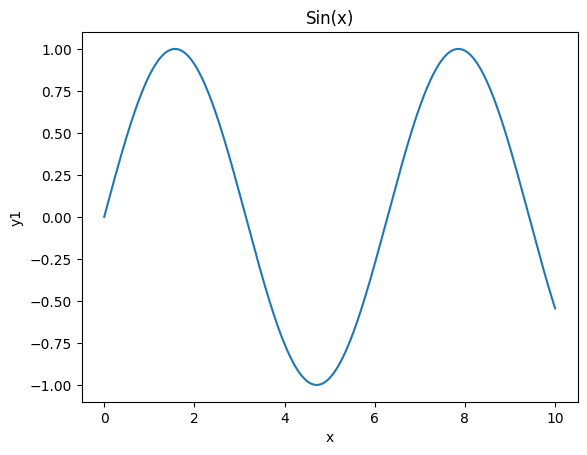

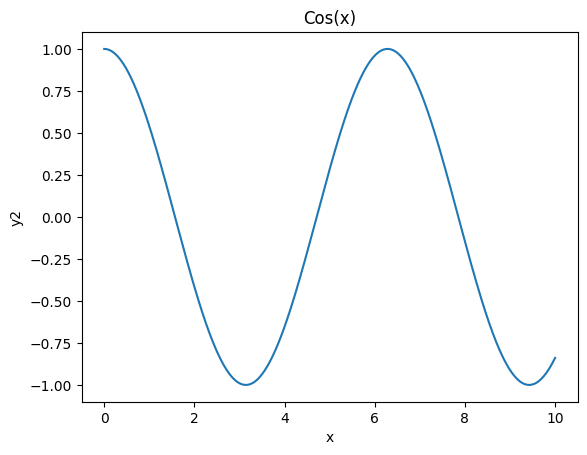

In [22]:
import numpy as np

import matplotlib.pyplot as plt

def plot_functions():
    x=np.linspace(0,10,1000)
    

    
    y1=np.sin(x)
    y2=np.cos(x)

    plt.plot(x, y1)
    plt.xlabel('x')
    plt.ylabel('y1')
    plt.title('Sin(x)')

    plt.show()

    plt.plot(x, y2)
    plt.xlabel('x')
    plt.ylabel('y2')
    plt.title('Cos(x)')

    plt.show()

    return
plot_functions()